In [46]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [35]:
def create_c (N):
    h = 1/N
    a = np.full(N, fill_value=0.1)
    a[0]=2/(h**2)+1
    a[1]=-1/(h**2)
    a[-1]=-1/(h**2)
    return a

def create_b(N):
    return np.full(N, fill_value=1)

In [36]:
def timeit(N):
    start = time()
    c = create_c(N)
    b = create_b(N)

    C = np.fft.fft(c)
    B = np.fft.fft(b)

    X = B/C

    x = np.fft.ifft(X)
    x.real

    return time()-start



In [41]:
N = np.array([2**j for j in range(2,28, 2)])
run_time = np.array([timeit(n) for n in N])

/var/folders/89/w_60r_4x0cj3g1zv6zj2235h0000gn/T/ipykernel_5950/457014509.py:2: RuntimeWarning: divide by zero encountered in log
  y = x*np.log(x)/200_000_000
/var/folders/89/w_60r_4x0cj3g1zv6zj2235h0000gn/T/ipykernel_5950/457014509.py:2: RuntimeWarning: invalid value encountered in multiply
  y = x*np.log(x)/200_000_000


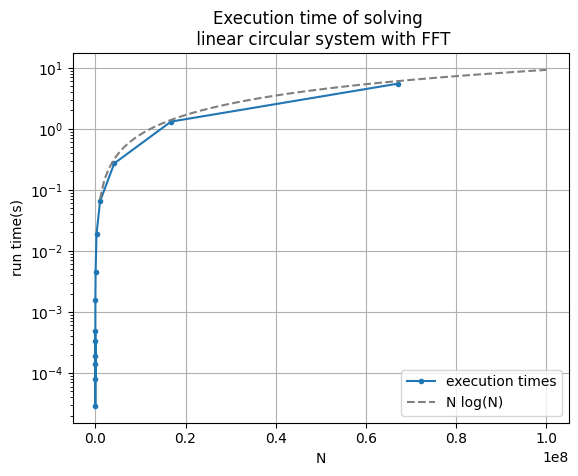

In [45]:
x = np.linspace(0,1e8,100)
y = x*np.log(x)/200_000_000
fig, ax = plt.subplots(1,1)
ax.plot(N, run_time, marker='.', label = 'execution times')
ax.plot(x,y, label = 'N log(N)', c = 'grey', linestyle='--')
ax.set(yscale = 'log',xlabel='N', ylabel='run time(s)', title='Execution time of solving \n linear circular system with FFT')
ax.grid()
ax.legend()